In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 변수 정의

num = 10
num_coeffs = 1
epochs = 1000
learning_rate = 0.2

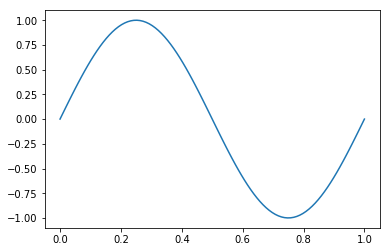

In [7]:
# 정상적인 sin(2πx)의 그래프

sinx = np.linspace(0.0, 1.0, 100)
siny = np.sin(2 * np.pi * sinx)

plt.plot(sinx, siny)
plt.show()

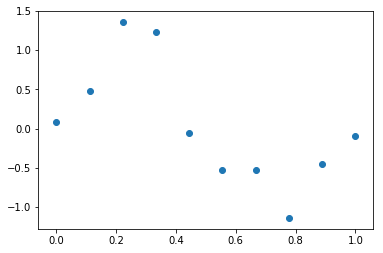

In [4]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

train_x = np.linspace(0.0, 1.0, num)
n = np.random.uniform(-0.5, 0.5, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.show()

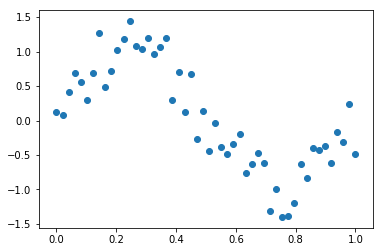

In [9]:
# 테스트 데이터 만들기
test_num = 50

test_x = np.linspace(0.0, 1.0, test_num)
n = np.random.uniform(-0.5, 0.5, test_num)
test_y = np.sin(2 * np.pi * test_x)
test_y += n

plt.scatter(test_x, test_y)
plt.show()

epoch : 0, cost : 4.87115


epoch : 100, cost : 4.19205


epoch : 200, cost : 4.19205


epoch : 300, cost : 4.19205


epoch : 400, cost : 4.19205


epoch : 500, cost : 4.19205


epoch : 600, cost : 4.19205


epoch : 700, cost : 4.19205


epoch : 800, cost : 4.19205


epoch : 900, cost : 4.19205


[ 0.46188536  0.38566449  0.30944362  0.23322277  0.15700188  0.08078104
  0.00456017 -0.07166067 -0.14788154 -0.22410241]
test cost : 20.652737


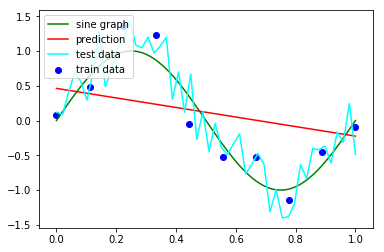

In [10]:
num = 10
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)

# 세션 시작

with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 5.59687


epoch : 100, cost : 4.23797


epoch : 200, cost : 4.28019


epoch : 300, cost : 4.29873


epoch : 400, cost : 4.30272


epoch : 500, cost : 4.30352


epoch : 600, cost : 4.30367


epoch : 700, cost : 4.3037


epoch : 800, cost : 4.30371


epoch : 900, cost : 4.30371


[ 1.05464673  0.66167676  0.33633471  0.07862058 -0.11146569 -0.23392415
 -0.28875458 -0.27595723 -0.19553185 -0.04747868]
test cost : 19.184299


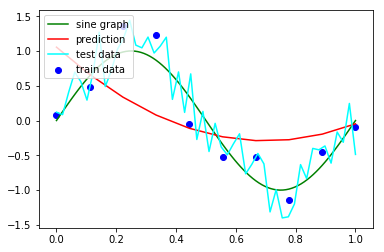

In [19]:
num = 10
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)

# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작

with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 4.37084


epoch : 100, cost : 3.47467


epoch : 200, cost : 3.15915


epoch : 300, cost : 2.88091


epoch : 400, cost : 2.64048


epoch : 500, cost : 2.43268


epoch : 600, cost : 2.25298


epoch : 700, cost : 2.09748


epoch : 800, cost : 1.96284


epoch : 900, cost : 1.84617


[ 0.59302253  0.77416182  0.70482737  0.46355036  0.12886208 -0.22070646
 -0.50662374 -0.65035868 -0.57338142 -0.19715881]
test cost : 8.093378


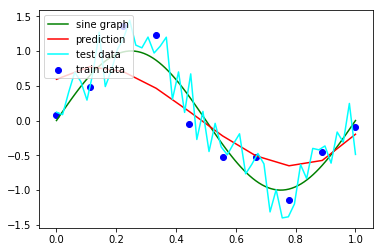

In [21]:
num = 10
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 10.8341


epoch : 100, cost : 4.2091


epoch : 200, cost : 3.42955


epoch : 300, cost : 2.82073


epoch : 400, cost : 2.34511


epoch : 500, cost : 1.97419


epoch : 600, cost : 1.68496


epoch : 700, cost : 1.45942


epoch : 800, cost : 1.28352


epoch : 900, cost : 1.14633


[ 0.33880562  0.81026727  0.92364007  0.69981009  0.22070836 -0.34782898
 -0.76224858 -0.78476524 -0.42222404 -0.43509912]
test cost : 4.800622


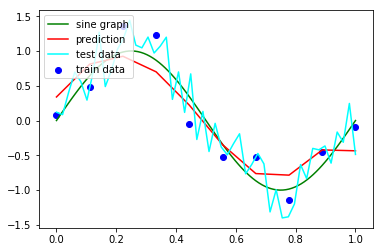

In [22]:
num = 10
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

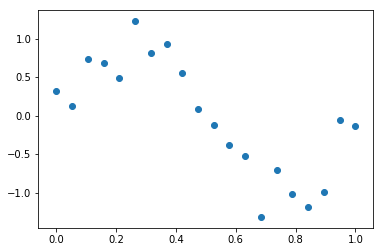

In [26]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

num = 20

train_x = np.linspace(0.0, 1.0, num)
n = np.random.uniform(-0.5, 0.5, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.show()

epoch : 0, cost : 9.51253


epoch : 100, cost : 8.16728


epoch : 200, cost : 8.16728


epoch : 300, cost : 8.16728


epoch : 400, cost : 8.16728


epoch : 500, cost : 8.16728


epoch : 600, cost : 8.16728


epoch : 700, cost : 8.16728


epoch : 800, cost : 8.16728


epoch : 900, cost : 8.16728


[ 0.3691242   0.34027416  0.31142408  0.282574    0.25372395  0.22487387
  0.19602382  0.16717373  0.13832368  0.10947362  0.08062357  0.05177349
  0.02292344 -0.00592667 -0.03477675 -0.0636268  -0.09247684 -0.12132692
 -0.15017697 -0.17902705]
test cost : 21.995384


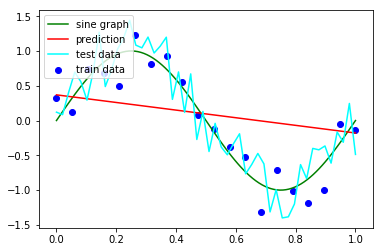

In [27]:
num = 20
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 15.1105


epoch : 100, cost : 6.74542


epoch : 200, cost : 6.83181


epoch : 300, cost : 6.86664


epoch : 400, cost : 6.87305


epoch : 500, cost : 6.87414


epoch : 600, cost : 6.87432


epoch : 700, cost : 6.87435


epoch : 800, cost : 6.87435


epoch : 900, cost : 6.87435


[ 1.19925022  0.97912991  0.77535754  0.58793312  0.41685677  0.26212829
  0.12374789  0.00171533 -0.1039691  -0.19330555 -0.26629382 -0.32293469
 -0.36322713 -0.38717175 -0.39476836 -0.38601696 -0.36091757 -0.31947017
 -0.26167464 -0.18753147]
test cost : 18.078245


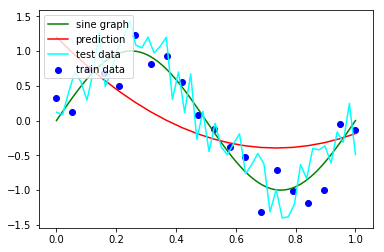

In [28]:
num = 20
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 22.0977


epoch : 100, cost : 5.00594


epoch : 200, cost : 4.58749


epoch : 300, cost : 4.22662


epoch : 400, cost : 3.91694


epoch : 500, cost : 3.65095


epoch : 600, cost : 3.42229


epoch : 700, cost : 3.2255


epoch : 800, cost : 3.05597


epoch : 900, cost : 2.90975


[ 0.58737755  0.69597083  0.74526125  0.74245685  0.69476533  0.60939485
  0.49355331  0.35444859  0.19928902  0.03528172 -0.13036442 -0.29044139
 -0.43774176 -0.56505799 -0.6651814  -0.73090363 -0.7550168  -0.73031616
 -0.64958811 -0.50562859]
test cost : 8.667609


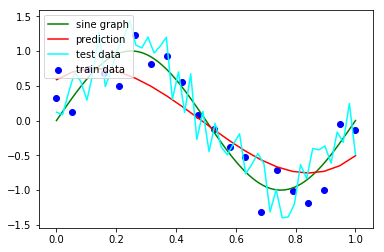

In [29]:
num = 20
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

epoch : 0, cost : 182.882


epoch : 100, cost : 23.0486


epoch : 200, cost : 20.8351


epoch : 300, cost : 18.3751


epoch : 400, cost : 16.3369


epoch : 500, cost : 14.7582


epoch : 600, cost : 13.5544


epoch : 700, cost : 12.6419


epoch : 800, cost : 11.9532


epoch : 900, cost : 11.4356


[ 0.13341443  0.56948662  0.87340516  1.04362762  1.08238482  0.99698752
  0.80119991  0.51651317  0.17304456 -0.19035433 -0.52732313 -0.78728503
 -0.92172879 -0.8945961  -0.69816786 -0.3760612  -0.05526972  0.01058817
 -0.61577797 -2.62902451]
test cost : 16.990715


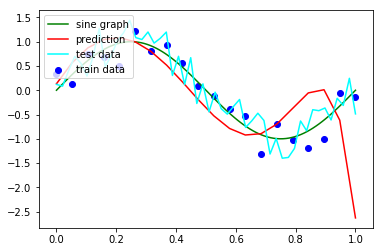

In [30]:
num = 20
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

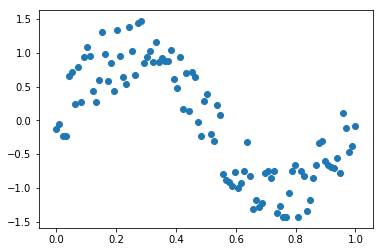

In [31]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

num = 100

train_x = np.linspace(0.0, 1.0, num)
n = np.random.uniform(-0.5, 0.5, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.show()

epoch : 0, cost : 193.631


epoch : 100, cost : 55.3502


epoch : 200, cost : 55.3502


epoch : 300, cost : 55.3502


epoch : 400, cost : 55.3502


epoch : 500, cost : 55.3502


epoch : 600, cost : 55.3502


epoch : 700, cost : 55.3502


epoch : 800, cost : 55.3502


epoch : 900, cost : 55.3502


[ 0.37418732  0.36895564  0.36372393  0.35849226  0.35326055  0.34802887
  0.34279716  0.33756548  0.3323338   0.32710209  0.32187042  0.31663871
  0.31140703  0.30617535  0.30094364  0.29571193  0.29048026  0.28524858
  0.28001687  0.27478519  0.26955348  0.2643218   0.25909013  0.25385845
  0.24862672  0.24339505  0.23816335  0.23293164  0.22769998  0.22246829
  0.21723658  0.2120049   0.20677319  0.20154151  0.19630982  0.19107813
  0.18584643  0.18061477  0.17538305  0.17015137  0.16491967  0.15968798
  0.15445629  0.14922461  0.1439929   0.13876121  0.13352954  0.12829785
  0.12306613  0.11783448  0.11260277  0.10737109  0.10213938  0.09690768
  0.091676    0.08644429  0.08121264  0.07598093  0.07074925  0.06551754
  0.06028587  0.05505416  0.04982248  0.0445908   0.03935909  0.03412741
  0.02889571  0.02366403  0.01843232  0.01320067  0.00796893  0.00273722
 -0.00249445 -0.0077261  -0.01295778 -0.01818949 -0.0234212  -0.02865291
 -0.03388458 -0.03911626 -0.04434797 -0.04957965 -0

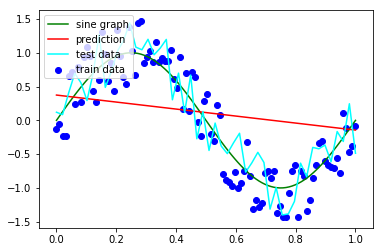

In [33]:
num = 100
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()

epoch : 0, cost : 79.9607


epoch : 100, cost : 46.788


epoch : 200, cost : 47.777


epoch : 300, cost : 47.9865


epoch : 400, cost : 48.0171


epoch : 500, cost : 48.0213


epoch : 600, cost : 48.0219


epoch : 700, cost : 48.0219


epoch : 800, cost : 48.0219


epoch : 900, cost : 48.0219


[ 1.58359492  1.52354169  1.4643811   1.40611315  1.34873784  1.29225528
  1.23666537  1.18196809  1.12816358  1.07525158  1.02323246  0.9721058
  0.9218719   0.87253076  0.82408214  0.77652621  0.72986293  0.68409246
  0.63921452  0.59522939  0.55213684  0.50993693  0.46862963  0.42821524
  0.38869324  0.35006416  0.31232756  0.2754834   0.23953247  0.20447412
  0.17030811  0.13703489  0.10465422  0.07316649  0.04257143  0.01286882
 -0.01594102 -0.04385811 -0.0708828  -0.09701449 -0.12225348 -0.14660013
 -0.17005378 -0.19261515 -0.21428365 -0.2350595  -0.25494242 -0.27393281
 -0.29203081 -0.30923569 -0.32554829 -0.34096813 -0.35549521 -0.3691299
 -0.3818717  -0.39372075 -0.40467727 -0.41474104 -0.42391181 -0.43219078
 -0.43957627 -0.44606936 -0.45167017 -0.45637739 -0.46019304 -0.46311474
 -0.46514511 -0.46628213 -0.46652651 -0.46587777 -0.46433735 -0.46190429
 -0.45857739 -0.45435834 -0.44924712 -0.44324279 -0.43634558 -0.4285562
 -0.41987371 -0.4102993  -0.39983106 -0.38847113 -0.37

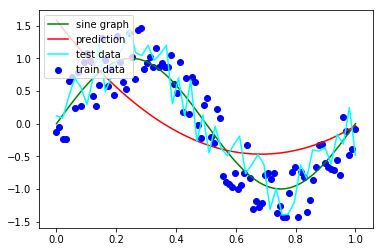

In [35]:
num = 100
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()  

epoch : 0, cost : 95.5102


epoch : 100, cost : 43.7795


epoch : 200, cost : 38.4612


epoch : 300, cost : 33.7475


epoch : 400, cost : 29.8211


epoch : 500, cost : 26.5529


epoch : 600, cost : 23.8323


epoch : 700, cost : 21.5673


epoch : 800, cost : 19.6813


epoch : 900, cost : 18.1107


[ 0.61770701  0.66444457  0.70716572  0.74596125  0.78092217  0.81213933
  0.83970374  0.86370623  0.88423783  0.90138942  0.91525197  0.92591625
  0.93347341  0.93801415  0.93962973  0.93841088  0.93444848  0.92783326
  0.91865671  0.90700924  0.89298201  0.87666583  0.85815185  0.83753073
  0.81489354  0.79033142  0.76393485  0.7357952   0.70600289  0.67464912
  0.64182484  0.60762143  0.57212913  0.53543836  0.49764156  0.45882899
  0.41909099  0.37851936  0.33720434  0.29523736  0.25270861  0.20971024
  0.16633165  0.12266576  0.07880139  0.03483069 -0.00915539 -0.05306673
 -0.09681177 -0.14029956 -0.18343854 -0.22613931 -0.26831079 -0.30985999
 -0.35069847 -0.3907342  -0.42987609 -0.46803379 -0.50511622 -0.5410316
 -0.57568932 -0.60899949 -0.64087033 -0.67121148 -0.69993091 -0.72694016
 -0.75214434 -0.77545452 -0.79678249 -0.81603336 -0.83311749 -0.84794235
 -0.86042166 -0.87046003 -0.87796831 -0.88285494 -0.88503122 -0.88440275
 -0.88088179 -0.87437487 -0.86479235 -0.85204124 -0.

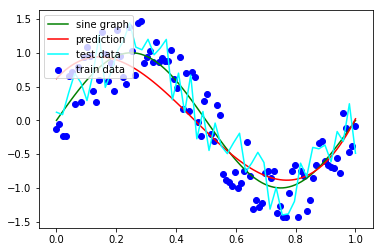

In [36]:
num = 100
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()      

epoch : 0, cost : 162167.0


epoch : 100, cost : 38835.4


epoch : 200, cost : 39048.7


epoch : 300, cost : 36698.5


epoch : 400, cost : 34402.8


epoch : 500, cost : 32651.4


epoch : 600, cost : 31448.2


epoch : 700, cost : 30631.0


epoch : 800, cost : 30154.1


epoch : 900, cost : 29875.3


[  8.40943146e+00   6.84897566e+00   5.37122822e+00   3.97655416e+00
   2.66525269e+00   1.43754888e+00   2.93591559e-01  -7.66551495e-01
  -1.74290562e+00  -2.63558531e+00  -3.44480634e+00  -4.17089319e+00
  -4.81427717e+00  -5.37551117e+00  -5.85528326e+00  -6.25440025e+00
  -6.57381439e+00  -6.81461477e+00  -6.97807026e+00  -7.06558180e+00
  -7.07873583e+00  -7.01928949e+00  -6.88918447e+00  -6.69053936e+00
  -6.42568922e+00  -6.09716320e+00  -5.70768833e+00  -5.26022387e+00
  -4.75792694e+00  -4.20420504e+00  -3.60269475e+00  -2.95723176e+00
  -2.27192187e+00  -1.55106413e+00  -7.99264967e-01  -2.13051401e-02
   7.77780652e-01   1.59272695e+00   2.41802883e+00   3.24798560e+00
   4.07667732e+00   4.89795828e+00   5.70555687e+00   6.49294662e+00
   7.25354147e+00   7.98053885e+00   8.66707420e+00   9.30620098e+00
   9.89090252e+00   1.04141550e+01   1.08689575e+01   1.12484064e+01
   1.15456629e+01   1.17540483e+01   1.18671789e+01   1.18788958e+01
   1.17834187e+01   1.15753746e+01

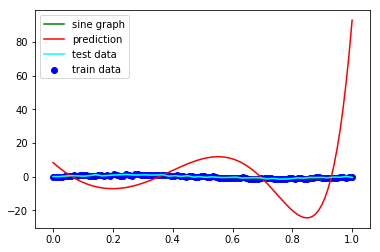

In [37]:
num = 100
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
plt.show()      

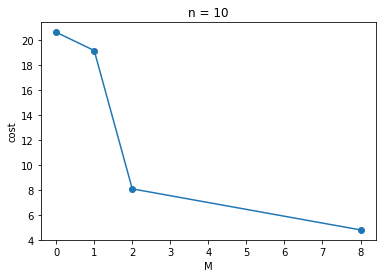

In [54]:
# n이 10일때 test cost 그래프

x = [0, 1, 2, 8]
n10 = [20.652737, 19.184299, 8.093378, 4.800622]

plt.plot(x, n10, 'o-')
plt.title('n = 10')
plt.xlabel('M')
plt.ylabel('cost')
plt.show()

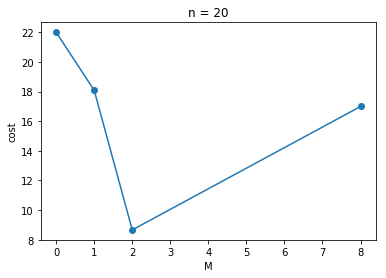

In [56]:
# n = 20일때 test cost 그래프

x = [0, 1, 2, 8]
n20 = [21.995384, 18.078245, 8.667760, 16.990715]

plt.plot(x, n20, 'o-')
plt.title('n = 20')
plt.xlabel('M')
plt.ylabel('cost')
plt.show()

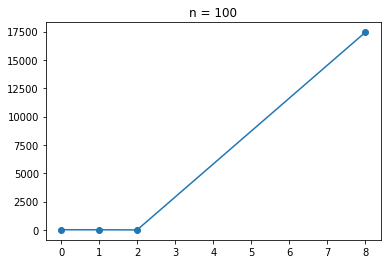

In [57]:
# n = 100일때 test cost 그래프

x = [0, 1, 2, 8]
n100 = [22.450443, 20.469490, 6.768417, 17442.880859]

plt.plot(x, n100, 'o-')
plt.title('n = 100')
plt.xlabel('M')
plt.ylabel('cost')
plt.show()